<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Teguh !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Teguh ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Teguh dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Pernyataan

Perusahaan asuransi bernama "Sure Tomorrow" ingin menyelesaikan beberapa masalah dengan bantuan *machine learning*. Anda pun diminta untuk mengevaluasi kemungkinan tersebut.

- Tugas 1: Temukan klien yang mirip dengan kriteria klien tertentu. Tugas ini akan memudahkan perusahaan untuk melakukan pemasaran.
- Tugas 2: Prediksi apakah klien baru kemungkinan akan mengambil klaim asuransi. Apakah prediksi model lebih baik daripada prediksi model *dummy*?
- Tugas 3: Prediksi besaran klaim asuransi yang mungkin diterima klien baru menggunakan model regresi linear.
- Tugas 4: Lindungi data pribadi klien tanpa merusak model dari tugas sebelumnya. Sangatlah penting untuk mengembangkan algoritme transformasi data yang dapat mencegah penyalahgunaan informasi pribadi klien jika data tersebut jatuh ke tangan yang salah. Hal ini disebut penyembunyian data atau pengaburan data. Namun, prosedur perlindungan datanya pun perlu diperhatikan agar kualitas *model machine* learning tidak menurun. Di sini, Anda tidak perlu memilih model yang terbaik, cukup buktikan bahwa algoritme Anda bekerja secara akurat.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Pra-pemrosesan & Eksplorasi Data

## Inisialisasi

In [1]:
pip install scikit-learn --upgrade

     |████████████████████████████████| 10.9 MB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 64.8 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from IPython.display import display

## Muat Data

Muat data dan lakukan pemeriksaan untuk memastikan data bebas dari permasalahan.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Kami mengganti nama kolom untuk membuat kode terlihat lebih konsisten dengan gayanya.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

gender   age   income  family_members  insurance_benefits
51         0  30.0  38600.0               2                   0
901        1  34.0  34400.0               1                   0
117        1  52.0  32000.0               0                   2
1209       0  33.0  29800.0               1                   0
433        1  30.0  45200.0               3                   0
2972       1  44.0  33000.0               1                   1
1143       1  50.0  58200.0               0                   2
1735       0  29.0  45000.0               0                   0
1256       0  31.0  57000.0               0                   0
3854       0  28.0  41200.0               0                   0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# mengubah kolom age ke tipe data integer
df.age = df.age.astype('int')

In [8]:
# periksa apakah proses pengubahannya sudah berhasil
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
df.shape

(5000, 5)

In [10]:
# Sekarang, amati statistika deskriptif dari data kita. 
# Apakah semuanya sudah benar?
df.describe().transpose()

count        mean          std     min      25%      50%  \
gender              5000.0      0.4990     0.500049     0.0      0.0      0.0   
age                 5000.0     30.9528     8.440807    18.0     24.0     30.0   
income              5000.0  39916.3600  9900.083569  5300.0  33300.0  40200.0   
family_members      5000.0      1.1942     1.091387     0.0      0.0      1.0   
insurance_benefits  5000.0      0.1480     0.463183     0.0      0.0      0.0   

                        75%      max  
gender                  1.0      1.0  
age                    37.0     65.0  
income              46600.0  79000.0  
family_members          2.0      6.0  
insurance_benefits      0.0      5.0

In [11]:
missing_report = df.isna().sum().to_frame()
missing_report.columns= ['missing_value_count']
missing_report

missing_value_count
gender                                0
age                                   0
income                                0
family_members                        0
insurance_benefits                    0

In [12]:
df.sample(5)

gender  age   income  family_members  insurance_benefits
1569       0   23  41100.0               1                   0
3416       1   43  44600.0               3                   1
4915       0   19  37700.0               1                   0
3382       0   27  47800.0               0                   0
4748       1   41  33700.0               2                   0

## EDA

Mari kita periksa dengan cepat, apakah ada kelompok pelanggan tertentu dengan melihat plot pasangan?

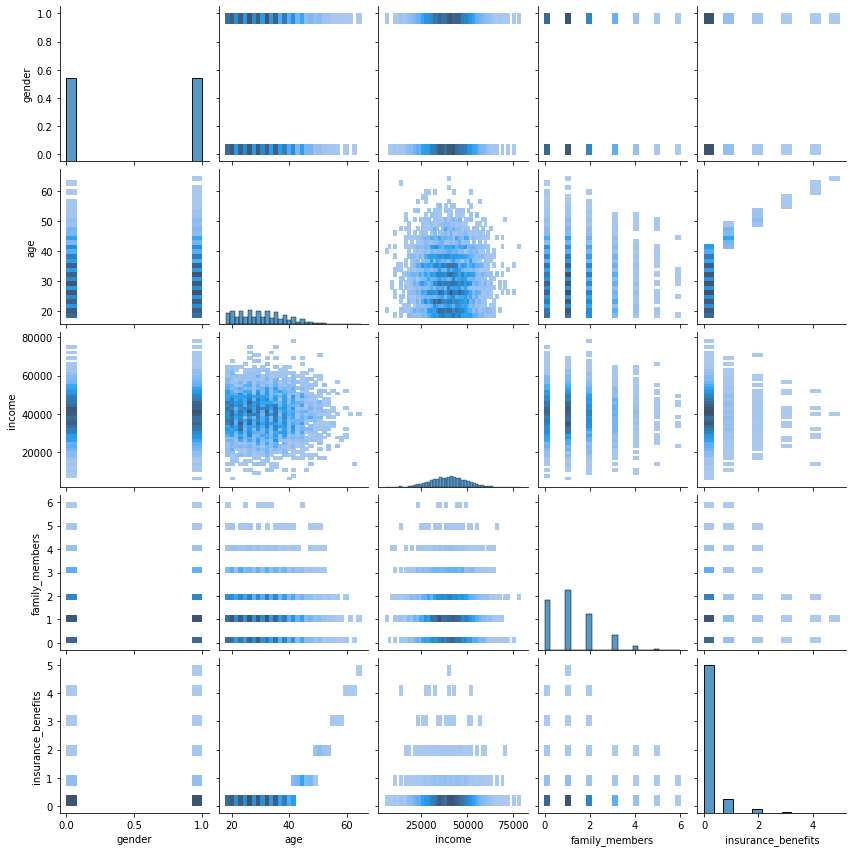

In [13]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Baiklah, sepertinya agak sulit untuk melihat kelompok (klaster) yang jelas mengingat sulitnya menggabungkan beberapa variabel secara bersamaan (untuk menganalisis distribusi multivariat). Namun, itulah gunanya LA dan ML di sini.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Tugas 1. Klien yang Mirip

Dalam bahasa pemrograman ML, penting untuk mengembangkan prosedur yang bisa menentukan *k-nearest neighbors* (objek) pada objek tertentu berdasarkan jarak antar objek.

Anda mungkin ingin mengulas kembali pelajaran berikut (bab -> pelajaran)
- Jarak Antar Vektor -> Jarak Euklides
- Jarak Antar Vektor -> Jarak Manhattan

Untuk menyelesaikan tugas ini, kita bisa mencoba beberapa metrik jarak.

Buatlah sebuah fungsi yang menampilkan *k-nearest neighbors* terdekat untuk objek ke-n berdasarkan metrik jarak tertentu.  Besarnya klaim asuransi yang diterima tidak perlu diperhitungkan dalam tugas ini.

Anda bisa menggunakan implementasi algoritme kNN yang sudah tersedia di Scikit-learn  (periksa [tautan](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) ini) atau menggunakan punya Anda sendiri.

Uji algoritme tersebut untuk empat kombinasi dari dua kasus
- Penskalaan
  - data tidak diskalakan
  - data diskalakan dengan [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Metrik Jarak
  - Euklides
  - Manhattan

Jawablah pertanyaan-pertanyaan berikut:
- Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?
- Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [15]:
def get_knn(df, n, k, metric):
    
    """
    Menampilkan k nearest neighbors

    :param df: DataFrame Pandas digunakan untuk menemukan objek-objek yang mirip di dalamnya
    :param n: nomor objek yang dicari k nearest neighbors
    :param k: jumlah k nearest neighbors yang ditampilkan
    :param metric: nama metrik jarak
    """

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Mengatur skala data.

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [17]:
df_scaled.sample(5)

gender       age    income  family_members  insurance_benefits
2050     1.0  0.430769  0.556962        0.333333                   0
4726     1.0  0.292308  0.401266        0.166667                   0
3136     0.0  0.338462  0.478481        0.166667                   0
2764     0.0  0.400000  0.310127        0.000000                   0
3632     1.0  0.400000  0.573418        0.500000                   0

Sekarang, mari kita dapatkan catatan yang mirip untuk setiap kombinasi yang ada

## Uji Algoritma KNN

### Jarak Euclidean

#### Kelas / Label Mayoritas `incurance_benefits` = 0

In [18]:
# KNN - euclidean dengan dataset tanpa penskalaan
get_knn(df, 0, 9, 'euclidean')

gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  1.732051
4031       1   44  49600.0               2                   1  3.162278
3424       0   38  49600.0               0                   0  3.316625
815        1   37  49600.0               2                   0  4.123106
4661       0   45  49600.0               0                   1  4.242641
2125       0   37  49600.0               2                   0  4.242641
3900       1   36  49600.0               0                   0  5.099020

In [19]:
# KNN - euclidean dengan dataset dengan penskalaan
get_knn(df_scaled, 0, 9, 'euclidean')

gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754
4869     1.0  0.646154  0.637975        0.166667                   1  0.018418
3275     1.0  0.646154  0.651899        0.166667                   1  0.028550
1567     1.0  0.615385  0.602532        0.166667                   0  0.029624
3365     1.0  0.630769  0.596203        0.166667                   0  0.031646
2103     1.0  0.630769  0.596203        0.166667                   0  0.031646
124      1.0  0.661538  0.635443        0.166667                   1  0.031693

#### Kelas / Label Minoritas `insurance_benefits` = 1

In [20]:
# KNN - euclidean dengan dataset tanpa penskalaan
get_knn(df, 1, 9, 'euclidean')

gender  age   income  family_members  insurance_benefits   distance
1          0   46  38000.0               1                   1   0.000000
3920       0   40  38000.0               0                   0   6.082763
4948       1   37  38000.0               1                   0   9.055385
2528       1   36  38000.0               0                   0  10.099505
3593       0   33  38000.0               0                   0  13.038405
3868       0   32  38000.0               0                   0  14.035669
3531       0   27  38000.0               0                   0  19.026298
123        1   27  38000.0               5                   0  19.442222
1905       1   26  38000.0               2                   0  20.049938

In [21]:
# KNN - euclidean dengan dataset dengan penskalaan
get_knn(df_scaled, 1, 9, 'euclidean')

gender       age    income  family_members  insurance_benefits  distance
1        0.0  0.707692  0.481013        0.166667                   1  0.000000
4162     0.0  0.707692  0.477215        0.166667                   1  0.003797
1863     0.0  0.707692  0.492405        0.166667                   1  0.011392
4986     0.0  0.723077  0.491139        0.166667                   1  0.018418
4477     0.0  0.692308  0.459494        0.166667                   1  0.026453
2434     0.0  0.676923  0.482278        0.166667                   1  0.030795
1654     0.0  0.676923  0.486076        0.166667                   1  0.031183
3671     0.0  0.676923  0.470886        0.166667                   1  0.032393
1672     0.0  0.738462  0.460759        0.166667                   1  0.036837

### Jarak Manhattan

#### Kelas / Label Mayoritas `incurance_benefits` = 0

In [22]:
# KNN - manhattan dengan dataset tanpa penskalaan
get_knn(df, 0, 9, 'manhattan')

gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0       0.0
2022       1   41  49600.0               0                   0       1.0
1225       0   42  49600.0               0                   1       3.0
4031       1   44  49600.0               2                   1       4.0
3424       0   38  49600.0               0                   0       5.0
815        1   37  49600.0               2                   0       5.0
2349       1   46  49600.0               2                   1       6.0
4661       0   45  49600.0               0                   1       6.0
3900       1   36  49600.0               0                   0       6.0

In [23]:
# KNN - manhattan dengan dataset dengan penskalaan
get_knn(df_scaled, 0, 9, 'manhattan')

gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.024245
4869     1.0  0.646154  0.637975        0.166667                   1  0.025511
2103     1.0  0.630769  0.596203        0.166667                   0  0.031646
3365     1.0  0.630769  0.596203        0.166667                   0  0.031646
124      1.0  0.661538  0.635443        0.166667                   1  0.038364
4305     1.0  0.630769  0.588608        0.166667                   0  0.039241
3275     1.0  0.646154  0.651899        0.166667                   1  0.039435

#### Kelas / Label Minoritas `insurance_benefits` = 1

In [26]:
# KNN - manhattan dengan dataset tanpa penskalaan
get_knn(df, 1, 9, 'manhattan')

gender  age   income  family_members  insurance_benefits  distance
1          0   46  38000.0               1                   1       0.0
3920       0   40  38000.0               0                   0       7.0
4948       1   37  38000.0               1                   0      10.0
2528       1   36  38000.0               0                   0      12.0
3593       0   33  38000.0               0                   0      14.0
3868       0   32  38000.0               0                   0      15.0
3531       0   27  38000.0               0                   0      20.0
1905       1   26  38000.0               2                   0      22.0
123        1   27  38000.0               5                   0      24.0

In [25]:
# KNN - manhattan dengan dataset dengan penskalaan
get_knn(df_scaled, 1, 9, 'manhattan')

gender       age    income  family_members  insurance_benefits  distance
1        0.0  0.707692  0.481013        0.166667                   1  0.000000
4162     0.0  0.707692  0.477215        0.166667                   1  0.003797
1863     0.0  0.707692  0.492405        0.166667                   1  0.011392
4986     0.0  0.723077  0.491139        0.166667                   1  0.025511
2434     0.0  0.676923  0.482278        0.166667                   1  0.032035
1654     0.0  0.676923  0.486076        0.166667                   1  0.035833
4477     0.0  0.692308  0.459494        0.166667                   1  0.036904
55       0.0  0.707692  0.441772        0.166667                   1  0.039241
3671     0.0  0.676923  0.470886        0.166667                   1  0.040896

Jawab pertanyaannya

**Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?** 

**Data Un-Scaled**

Secara keseluruhan algoritma KNN yang menggunakan jarak `euclidean` untuk data yang tidak diskalakan dalam memprediksi kelas atau label mayoritas (`insurance_benefits` = 0) mempunyai performa yang cukup bagus, karena dalam K=8 algoritma tersebut menunjukkan bahwa kelas/label yang terdekat dan terbanyak adalah 0. Namun terdapat sedikit kesalahan saat menggunakan jarak `manhattan`terdapat kekeliruan dimana model memprediksi kelas/label secara 50:50 untuk kelas `1` & `0`.

Sedangkan dalam memprediksi kelas atau label minoritas (`insurance_benefits` = 1), data yang tidak diskalan melakukan kesalahan secara kesluruhan, dimana kelas/label yang harusnya diprediksi `1` malah diprediksi menjadi `0`. 

**Data Scaled**

Algoritma KNN dengan data yang menggunakan penskalaan mempunyai performa yang cukup bagus dalam memprediksi kelas atau label mayoritas maupun minoritas, dimana prediksi nya selalu tepat berdasarkan hasil yang telah diuji.

**Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?** 

Hasil yang didapatkan kurang lebih sama, karena terdapat beberapa index yang sama saat menggunakan jarak `euclidean` dan `manhattan`, performa model pun kurang lebih hampir sama dalam memprediksi kelas/label minoritas melakukan kesalahan secara keseluruhan. Namun dalam memprediksi kelas mayoritas, menggunakan jarak `manhattan` terdapat kekeliruan jumlah K (tetangga) label yg sama antara 1&0. Berdasarkan uji coba diatas, performa maksimal didapatkan menggunakan jarak `euclidean`.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Tugas 2. Apakah klien kemungkinan menerima klaim asuransi?

Dalam konteks *machine learning*, tugas ini sama seperti tugas klasifikasi biner.

Dengan target insurance_benefits yang lebih dari nol, coba evaluasi apakah model klasifikasi kNN merupakan pendekatan yang lebih baik daripada model *dummy*.

Instruksi:
- Buat pengklasifikasi berbasis KNN dan ukur kualitasnya dengan metrik F1 untuk k=1..10 bagi data asli dan data yang diskalakan. Akan menarik untuk melihat bagaimana k dapat memengaruhi metrik evaluasi, dan apakah penskalaan data membuat hasilnya berbeda. Gunakan implementasi algoritme klasifikasi kNN yang tersedia di Scikit-learn (periksa [tautan ini](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) atau gunakan milik Anda sendiri.
- Buat model *dummy* yang acak untuk kasus ini. Model tersebut harusnya menampilkan "1" dengan beberapa probabilitas. Mari kita uji model dengan empat nilai probabilitas: 0, probabilitas membayar benefit asuransi apa pun; 0,5; 1.

Probabilitas membayar klaim asuransi dapat didefinisikan sebagai

$$
P\{\text{klaim asuransi yang diterima}\}=\frac{\text{jumlah klien yang menerima klaim asuransi}}{\text{jumlah klien secara keseluruhan}}.
$$

Pisahkan keseluruhan data menjadi 70:30 untuk proporsi *training* dan *test set*.

In [26]:
# Hitung tagetnya
display(df.insurance_benefits.value_counts())
# menambahkan kolom target baru
df['insurance_benefits_received'] = df.insurance_benefits.where(df.insurance_benefits == 0, 1) # nilai yang selain 0 diganti 1


0    4436
1     423
2     115
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64

In [27]:
# periksa ketidakseimbangan kelas dengan value_counts()
df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [28]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# jika Anda memiliki masalah dengan baris berikut, muat ulang kernel dan jalankan notebook kembali
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriks Kesalahan')
    print(cm)
    

In [29]:
# menghasilkan output dari model acak

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [30]:
# probabilitas model dummy
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probabilitasnya: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, df.shape[0])
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probabilitasnya: 0.00
F1: 0.00
Matriks Kesalahan
[[0.8872 0.    ]
 [0.1128 0.    ]]

Probabilitasnya: 0.11
F1: 0.12
Matriks Kesalahan
[[0.7914 0.0958]
 [0.0994 0.0134]]

Probabilitasnya: 0.50
F1: 0.20
Matriks Kesalahan
[[0.456  0.4312]
 [0.053  0.0598]]

Probabilitasnya: 1.00
F1: 0.20
Matriks Kesalahan
[[0.     0.8872]
 [0.     0.1128]]



In [31]:
# splitting data menjadi 70:30
df_train, df_test = train_test_split(df, test_size=.7, random_state=12345)

# feature
features_train = df_train[feature_names]
features_test = df_test[feature_names]
# target
target_train = df_train['insurance_benefits_received']
target_test = df_test['insurance_benefits_received']

### Evaluasi Model KNN Tanpa Penskalaan Data

In [32]:
for k in range(1, 11):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, target_train)
    pred_test = knn.predict(features_test)
    print(f'Evaluasi Model KNN Tanpa Penskalaan -> K = {k}'.center(50,' '))
    print(50*'-')
    eval_classifier(target_test, pred_test)
    print(50*'=')

   Evaluasi Model KNN Tanpa Penskalaan -> K = 1   
--------------------------------------------------
F1: 0.41
Matriks Kesalahan
[[0.85028571 0.034     ]
 [0.07742857 0.03828571]]
   Evaluasi Model KNN Tanpa Penskalaan -> K = 2   
--------------------------------------------------
F1: 0.13
Matriks Kesalahan
[[0.88       0.00428571]
 [0.10742857 0.00828571]]
   Evaluasi Model KNN Tanpa Penskalaan -> K = 3   
--------------------------------------------------
F1: 0.19
Matriks Kesalahan
[[0.87       0.01428571]
 [0.10228571 0.01342857]]
   Evaluasi Model KNN Tanpa Penskalaan -> K = 4   
--------------------------------------------------
F1: 0.06
Matriks Kesalahan
[[0.88171429 0.00257143]
 [0.11228571 0.00342857]]
   Evaluasi Model KNN Tanpa Penskalaan -> K = 5   
--------------------------------------------------
F1: 0.09
Matriks Kesalahan
[[0.87942857 0.00485714]
 [0.11028571 0.00542857]]
   Evaluasi Model KNN Tanpa Penskalaan -> K = 6   
-------------------------------------------------

### Evaluasi Model KNN Dengan Penskalaan

In [33]:
scaler = sklearn.preprocessing.MaxAbsScaler()

for k in range(1, 11):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    model = Pipeline([
        ('scaler', scaler),
        ('algo', knn)
    ])
    
    model.fit(features_train, target_train)
    pred_test = model.predict(features_test)
    print(f'Evaluasi Model KNN Dengan Penskalaan -> K = {k}'.center(50,' '))
    print(50*'-')
    eval_classifier(target_test, pred_test)
    print(50*'=')

  Evaluasi Model KNN Dengan Penskalaan -> K = 1   
--------------------------------------------------
F1: 0.89
Matriks Kesalahan
[[0.87628571 0.008     ]
 [0.01571429 0.1       ]]
  Evaluasi Model KNN Dengan Penskalaan -> K = 2   
--------------------------------------------------
F1: 0.84
Matriks Kesalahan
[[0.88085714 0.00342857]
 [0.02914286 0.08657143]]
  Evaluasi Model KNN Dengan Penskalaan -> K = 3   
--------------------------------------------------
F1: 0.87
Matriks Kesalahan
[[0.87714286 0.00714286]
 [0.02114286 0.09457143]]
  Evaluasi Model KNN Dengan Penskalaan -> K = 4   
--------------------------------------------------
F1: 0.86
Matriks Kesalahan
[[0.882      0.00228571]
 [0.02714286 0.08857143]]
  Evaluasi Model KNN Dengan Penskalaan -> K = 5   
--------------------------------------------------
F1: 0.88
Matriks Kesalahan
[[0.87914286 0.00514286]
 [0.02142857 0.09428571]]
  Evaluasi Model KNN Dengan Penskalaan -> K = 6   
-------------------------------------------------

**Kesimpulan**

Model menggunakan algoritma KNN mendapatkan performa yang lebih maksimal dengan data yang diskalakan. Dapat dilihat juga dimana metriks f1_score jauh lebih bagus dari pada menggunakan data tanpa penskalaan dan model dummy. 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Tugas 3. Regresi (dengan Regresi Linear)

Dengan `insurance_benefit` sebagai target, evaluasi berapa RMSE untuk model Regresi Linear.

Buat implementasi LR Anda sendiri. Untuk itu, coba ingat-ingat kembali bagaimana solusi tugas regresi linear dirumuskan dalam bentuk LA. Periksa RMSE untuk data asli maupun data yang telah diskalakan. Bisakah Anda melihat perbedaan RMSE di antara kedua kasus ini?

Tunjukkan
- $X$ — matriks fitur, satu baris merepresentasikan satu kasus, tiap kolom adalah fitur, kolom pertama terdiri dari satuan
- $y$ — target (vektor)
- $\hat{y}$ — estimasi target (vektor)
- $w$ — bobot vektor

Matriks untuk regresi linear dapat dirumuskan sebagai

$$
y = Xw
$$

Tujuan pelatihan untuk menemukan $w$ yang akan meminimalkan jarak L2 (MSE) antara $Xw$ dan $y$:

$$
\min_w d_2(Xw, y) \quad \text{atau} \quad \min_w \text{MSE}(Xw, y)
$$

Sepertinya ada solusi analitis untuk masalah di atas:

$$
w = (X^T X)^{-1} X^T y
$$

Rumus di atas bisa digunakan untuk menemukan bobot $w$ dan yang terakhir dapat digunakan untuk menghitung nilai prediksi

$$
\hat{y} = X_{val}w
$$

Pisahkan keseluruhan data menjadi *training set* dan *validation set* dengan proporsi 70:30. Gunakan metrik RMSE untuk evaluasi model.

In [34]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)# < kode program di sini >

    def predict(self, X):
        
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1) # < ketik kode program Anda di sini >
        y_pred = X2.dot(self.weights) # < ketik kode program Anda di sini >
        
        return y_pred

In [35]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

### Evaluasi Model Linear Regression Untuk Data Tanpa Penskalaan

In [36]:
lr = MyLinearRegression()

In [37]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)


lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


### Evaluasi Model Linear Regression Untuk Data Dengan Penskalaan

In [38]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)


lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


**Kesimpulan**

Untuk model linear regression sepertinya tidak ada perbedaan untuk metriks *RMSE* dan *R2* nya untuk data yang digunakan saat ini (tanpa skala dan dengan skala).

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Tugas 4. Pengaburan Data

Cara terbaik untuk mengaburkan data adalah dengan mengalikan fitur-fitur numerik (ingat bahwa fitur-fitur tersebut bisa di lihat di matriks $X$) dengan matriks yang dapat dibalik (*invertible*) $P$. 

$$
X' = X \times P
$$

Coba lakukan itu dan periksa bagaimana nilai fitur akan terlihat setelah transformasi. Sifat *invertible* sangat penting pada kasus ini, jadi pastikan $P$ bahwa $P$ bersifat *invertible*.

Anda mungkin ingin meninjau kembali pelajaran 'Matriks dan Operasi Matriks -> Perkalian Matriks' untuk mengingat aturan perkalian matriks dan implementasinya dengan NumPy.

In [39]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [40]:
# data asli
X = df_pn.to_numpy()
X 

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Membuat matriks acak $P$.

In [41]:
# membuat matriks random P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
# menampilkan value dari variabel P
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [42]:
# Invertion P
P_inv = np.linalg.inv(P)
P_inv

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

In [43]:
# Memeriksa apakah matriks  𝑃 invertible
np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))

True

Memeriksa apakah matriks $P$ *invertible* -> Jawabannya adalah iya 

In [44]:
# transformasi data X
X_trans = X.dot(P)
X_trans

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Bisakah Anda menebak usia klien atau pendapatannya setelah dilakukan transformasi? -> Jawabannya kita tidak dapat melihat atau menebak data setelah dilakukan transformasi.

Bisakah Anda memulihkan data asli dari $X'$ jika $P$ sudah diketahui? Coba periksa hal tersebut melalui perhitungan dengan memindahkan $P$ dari sisi kanan rumus di atas ke sisi kiri. Aturan perkalian matriks sangat berguna di sini.

In [45]:
# X invers (X yang dikembalikan ke bentuk awal)
X_inv = X_trans.dot(P_inv)
X_inv

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Tampilkan ketiga kasus untuk beberapa klien
- Data asli
- Data yang sudah ditransformasikan
- Data yang telah dipulihkan ke semula

In [46]:
for i, data in zip(['Asli','Transformasi','Inverse'], [X, X_trans, X_inv]):
    print(f"Data {i}".center(80))
    print(80*'-')
    print(data[:2])
    print(80*'=')

                                   Data Asli                                    
--------------------------------------------------------------------------------
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]]
                               Data Transformasi                                
--------------------------------------------------------------------------------
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]]
                                  Data Inverse                                  
--------------------------------------------------------------------------------
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]]


Mungkin Anda bisa melihat bahwa terdapat beberapa nilai yang tidak benar-benar sama dengan data sebelum ditransformasi. Kenapa bisa begitu?

**Jawaban**

Data asli tampilannya tidak persis seperti data awal karena data dikonversi ke dalam bentuk representasi numpy array.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

##  Buktikan Bahwa Pengaburan Data Bisa Bekerja dengan LR

Tugas regresi pada proyek ini telah diselesaikan dengan regresi linear. Tugas selanjutnya adalah untuk membuktikan secara analitis bahwa metode pengaburan data tertentu tidak akan memengaruhi prediksi nilai regresi linear - nilai-nilai prediksi tersebut tidak akan berubah dari hasil awalnya. Apakah Anda yakin Anda bisa melakukannya?? Anda tidak harus yakin sekarang, tetapi Anda harus membuktikannya!

Jadi, data yang ada telah dikaburkan dan sekarang terdapat $X \times P$ alih-alih hanya $X$. Akibatnya, ada bobot lain $w_P$ sebagai
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Bagaimana menghubungkan $w$ dan $w_P$ jika Anda menyederhanakan rumus untuk wP di atas?

Nilai apa yang akan $w_P$ prediksi? 

Apa artinya bagi kualitas regresi linier jika Anda mengukurnya dengan RMSE?

Periksa lampiran B (Sifat-sifat Matriks) di bagian *notebook*. Tersedia beberapa rumus yang berguna di sana!

Tidak ada kode yang begitu penting di sesi ini, hanya penjelasan analitis!

**Jawaban**

Penjelasan analisis:

1. Bagaimana menghubungkan  𝑤 dan  𝑤𝑃 jika menyederhanakan rumus untuk  𝑤𝑃 di atas?

- Untuk menghubungkan rumus:

$$ 
w_P = [(XP)^T XP]^{-1} (XP)^T y 
$$

- Kita perlu memperluas $ XP^T $ menggunakan reversivitas properti transpose: 

$$ 
w_p = [P^T X^T XP]^{-1} P^T X^T y
$$

- lalu atur ulang rumus : 

$$ 
w_p = (P^T (X^T X) P)^{-1} P^T X^T y 
$$

- dan mengubah $P^T$ menjadi $P^{-1}$ contoh : $(P^T (X^T X) P)^{-1}$ :

$$ 
w_p = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y 
$$

- Karena Jika matriks $A$ apapun dikali dengan matriks identitas (atau sebaliknya), hasilnya adalah matriks $A$ itu sendiri. $ A⋅E=E⋅A=A $ an dapat dirumuskan  $(P^T)^{-1} P^T = P^T (P^T)^{-1}  = I$

- Dengan persamaan : 

$$ w_p = P^{-1} (X^T X)^{-1} I X^T y $$

- Lalu mengubah $w = (X^T X)^{-1} X^T y$ kedalam persamaan : 

$$\therefore w_p = P^{-1} w $$

2. Nilai apa yang akan  𝑤𝑃 prediksi?

- Mengingat bahwa :  $a = Xw$

- menyerupai persamaan : $a' = X'w_p$

- dimana jika dengan contoh kasus diatas : $X' = XP$

- jika kita masukkan dalam persamaan $w_p = P^{-1}w$

- dan mengganti nilai $a'$ sehingga kita mempunyai persamaan :

$$\begin{align*}
    a' &= XP.P^{-1}w = XIw \\
    \therefore a' &= Xw = a
\end{align*}$$


3. Apa artinya kualitas regresi linier jika mengukurnya dengan RMSE?

- Sejak $a'$ sama dengan $a$, kita dapat berasumsi RMSE yang dihitung untuk kumpulan data asli dan dengan penskalaan menjadi sama maka Kualitas model regresi linier yang diukur menggunakan RMSE akan serupa.

## Uji Regresi Linear dengan Pengaburan Data

Sekarang, mari kita buktikan kalau Regresi Linear dapat bekerja secara komputasi dengan transformasi pengaburan yang dipilih.

Buat prosedur atau kelas yang menjalankan regresi linear dengan pengaburan data. Anda bisa menggunakan regresi linear yang tersedia di scikit-learn atau milik Anda sendiri.

Jalankan regresi linear terhadap data asli dan data yang disamarkan, bandingkan nilai prediksi dan RMSE, serta nilai metrik $R^2$. Apakah ada perbedaan?

**Prosedur**

- Buat matriks persegi $P$ dari angka acak.
- Periksa apakah matriks tersebut *invertible*. Jika tidak, ulangi dari langkah pertama sampai kita mendapatkan matriks yang bisa dibalik (*invertible*).
- <! ketik komentar Anda di sini !>
- Gunakan $XP$ sebagai matriks fitur baru 

In [47]:
# matrix persegi P dengan angka yang acak
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [48]:
# memriksa jika matrix P dapat di invers
np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))


True

### Linear Regresi Dengan Data Asli

In [49]:
# features
X = df_pn.to_numpy()
# target
y = df.insurance_benefits.to_numpy()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# fitting model linear regression custome
lr.fit(X_train, y_train)
print(lr.weights)

# Membuat prediksi dan metrik evaluasi
y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  1.64272726e-02  3.57495491e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


### Linear Regresi Dengan Pengaburan Data

In [51]:
# feature dengan pengaburan data
X_trans = X.dot(P)

# Memisahkan data
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y, test_size=0.3, random_state=12345)
                                                                        
# fitting model linear regression custome
lr.fit(X_train_trans, y_train_trans)
print(lr.weights)

# Membuat prediksi dan metrik evaluasi
y_pred_trans = lr.predict(X_test_trans)
eval_regressor(y_test_trans, y_pred_trans)

[-0.94353902 -0.05791721 -0.01546567  0.09871889 -0.02397536]
RMSE: 0.34
R2: 0.66


# Kesimpulan

1. Dataset yang dimiliki mempunyai 5000 baris dan 5 kolom dan tidak terdapat nilai yang hilang dari dataset yang dimiliki. Kemudian pada kolom `age` kita mengubah tipe datanya ke `int`.
2. Dalam evaluasi model KNearestNeighbor (KNN) kita dapat menyimpulkan bahwa data yang telah dilakukan penskalaan bisa mendapatkan hasil yang lebih maksimal dalam memprediksi kelas / label yang imbalance dari pada data standar yang tidak diskalakan. Bisa dilihat dari matriks f1_score yang mempunyai nilai sangat jauh dari data yang tidak diskalakan.
3. Untuk model dengan algoritma LinearRegression kita tidak mendapatkan perbedaan pada metriks RMSE dan R2 untuk dua jenis data tersebut (berskala dan tidak berskala). 
4. Setelah dilakukan pengaburan data, model regresi linear dapat bekerja dengan baik. Hal ini bisa diperhatikan bahwa nilai metriks RMSE dan R2 nya tidak berbeda dengan nilai metriks dari data asli.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Daftar Periksa

Ketik 'x' untuk memeriksa. Lalu tekan Shitf+Enter

- [x]  Jupyter Notebook dibuka
- [ ]  Tidak ada kesalahan kode
- [ ]  Sel disusun sesuai urutan yang logis dan eksekusi
- [ ]  Tugas 1 telah dikerjakan
    - [ ]  Ada prosedur yang bisa menampilkan k klien yang mirip dengan klien tertentu
    - [ ]  Prosedur diuji untuk keempat kombinasi yang diusulkan
    - [ ]  Pertanyaan terkait skala/jarak sudah terjawab
- [ ]  Tugas 2 telah dikerjakan
    - [ ]  Telah dibuat model klasifikasi acak untuk semua level probabilitas
    - [ ]  Model klasifikasi kNN telah dibuat dan diuji, baik untuk data asli maupun untuk data yang telah diberi skala. Metrik F1 telah diperhitungkan.
- [ ]  Tugas 3 telah dikerjakan
    - [ ]  Solusi regresi linear diimplementasikan menggunakan pengoperasian matriks.
    - [ ]  RMSE telah dihitung untuk solusi yang diimplementasikan.
- [ ]  Tugas 4 telah dikerjakan
    - [ ]  Data dikaburkan dengan matriks P acak dan *invertible*
    - [ ]  Data yang dikaburkan telah dipulihkan, ada beberapa contoh yang ditampilkan
    - [ ]  Terdapat bukti analitis bahwa transformasi tidak mempengaruhi RMSE
    - [ ]  Terdapat bukti perhitungan bahwa transformasi tidak memengaruhi RMSE
- [ ]  Ada kesimpulan

# Apendiks 

## Apendiks A: Menulis Rumus di Jupyter Notebooks

Anda dapat menulis rumus di Jupyter Notebook dalam bahasa *markup* yang disediakan oleh sistem penerbitan berkualitas tinggi bernama $\LaTeX$ (diucapkan "Lah-tech"), dan rumus tersebut akan terlihat seperti rumus yang ada di buku teks.

Untuk memasukkan rumus ke dalam teks, letakkan tanda dolar (\\$) sebelum dan sesudah teks rumus. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Jika rumus harus ditulis dalam satu paragraf tersendiri, letakkan dua tanda dolar (\\$\\$) sebelum dan sesudah teks.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

Bahasa markup [LaTeX](https://en.wikipedia.org/wiki/LaTeX) sangat populer di kalangan orang-orang yang menggunakan rumus dalam artikel, buku, dan teks. Bahasa tesebut memang tampak rumit, tetapi dasarnya sebenarnya mudah. Periksa dua halaman [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) berikut untuk mempelajari cara membuat rumus yang paling umum.

## Apendiks B: Properti Matriks

Matriks memiliki banyak properti di Aljabar Linear. Beberapa di antaranya ada di daftar berikut yang dapat membantu pembuktian analitis dalam proyek ini.

<table>
<tr>
<td>Pendistribusian</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-komutativitas</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Properti asosiatif dari perkalian</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Properti identitas perkalian</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilitas dari transposisi hasil kali matriks,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>